In [53]:
from braket.tracking import Tracker
t = Tracker().start()

In [54]:
# general imports
import matplotlib.pyplot as plt
import numpy as np
# magic word for producing visualizations in notebook
%matplotlib inline
import string
import time

# AWS imports: Import Braket SDK modules
from braket.aws import AwsDevice, AwsQuantumTask
from braket.circuits import Circuit, Gate, observables
from braket.device_schema import DeviceActionType
from braket.devices import Devices, LocalSimulator
from braket.parametric import FreeParameter

In [ ]:
aria = AwsDevice(Devices.IonQ.Harmony)
supported_gates = harmony.properties.action[DeviceActionType.OPENQASM].supportedOperations
# print the supported gate set
print('Gate set supported by the IonQ device:\n', supported_gates)
print('\n') 

In [55]:
# Define a circuit

nqubits=3
nshots=2000

circ = Circuit()

circ.ry(0, 0)
circ.rz(0, 0.36959914)
circ.ry(1, 0.73919827)
circ.rz(1, 1.10879741)
circ.ry(2, 1.47839654)
circ.rz(2, 1.84799568)
circ.cnot(0, 1)
circ.cnot(1, 2)
circ.ry(0, 2.21759481)
circ.rz(0, 2.58719395)
circ.ry(1, 2.95679309)
circ.rz(1, 3.32639222)
circ.ry(2, 3.69599136)
circ.rz(2, 4.06559049)
circ.cnot(0, 1)
circ.cnot(1, 2)
circ.ry(0, 4.43518963)
circ.rz(0, 4.80478876)
circ.ry(1, 5.1743879)
circ.rz(1, 5.54398704)
circ.ry(2, 5.91358617)
circ.rz(2, 6.28318531)
circ.cnot(0, 1)
circ.cnot(1, 2)

Circuit('instructions': [Instruction('operator': Ry('angle': 0.0, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 0.36959914, 'qubit_count': 1), 'target': QubitSet([Qubit(0)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Ry('angle': 0.73919827, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 1.10879741, 'qubit_count': 1), 'target': QubitSet([Qubit(1)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Ry('angle': 1.47839654, 'qubit_count': 1), 'target': QubitSet([Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': Rz('angle': 1.84799568, 'qubit_count': 1), 'target': QubitSet([Qubit(2)]), 'control': QubitSet([]), 'control_state': (), 'power': 1), Instruction('operator': CNot('qubi

In [56]:
print(circ)

T  : │     0      │     1      │  2  │     3      │     4      │     5      │  6  │     7      │     8      │     9      │ 10  │ 11  │
       ┌───────┐   ┌──────────┐       ┌──────────┐ ┌──────────┐                    ┌──────────┐ ┌──────────┐                          
q0 : ──┤ Ry(0) ├───┤ Rz(0.37) ├───●───┤ Ry(2.22) ├─┤ Rz(2.59) ├────────────────●───┤ Ry(4.44) ├─┤ Rz(4.80) ├────────────────●─────────
       └───────┘   └──────────┘   │   └──────────┘ └──────────┘                │   └──────────┘ └──────────┘                │         
      ┌──────────┐ ┌──────────┐ ┌─┴─┐              ┌──────────┐ ┌──────────┐ ┌─┴─┐              ┌──────────┐ ┌──────────┐ ┌─┴─┐       
q1 : ─┤ Ry(0.74) ├─┤ Rz(1.11) ├─┤ X ├──────●───────┤ Ry(2.96) ├─┤ Rz(3.33) ├─┤ X ├──────●───────┤ Ry(5.17) ├─┤ Rz(5.54) ├─┤ X ├───●───
      └──────────┘ └──────────┘ └───┘      │       └──────────┘ └──────────┘ └───┘      │       └──────────┘ └──────────┘ └───┘   │   
      ┌──────────┐ ┌──────────┐          ┌─┴─┐     ┌───

In [62]:
# run circuit (execute single TASK)
aria1_task = aria1.run(circ, shots=1000)

In [64]:
# get id and status of submitted quantum task
aria1_task_id = aria1_task.id
aria1_status = aria1_task.state()
# print('ID of quantum task:', aria1_task_id)
print('Status of quantum task:', aria1_status)

Status of quantum task: QUEUED


Status of (reconstructed) quantum task: COMPLETED


1000 shots taken on machine arn:aws:braket:us-east-1::device/qpu/ionq/Aria-1.

Measurement counts: Counter({'011': 261, '001': 257, '111': 178, '110': 118, '101': 69, '100': 44, '000': 38, '010': 35})


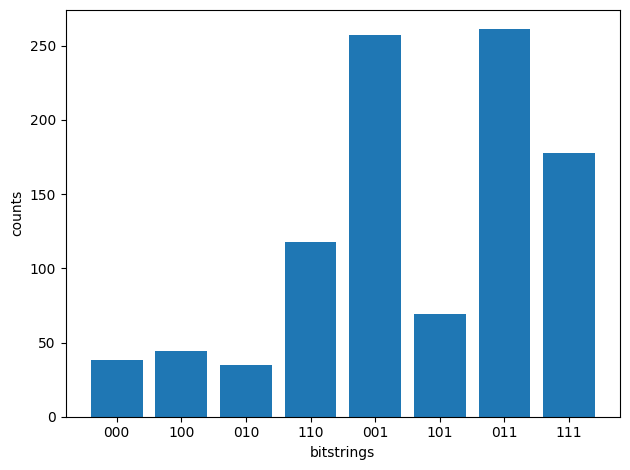

In [65]:
# recover quantum task
task_load = AwsQuantumTask(arn=aria1_task_id)

# print status
status = task_load.state()
print('Status of (reconstructed) quantum task:', status)
print('\n')
# wait for job to complete
# terminal_states = ['COMPLETED', 'FAILED', 'CANCELLED']
if status == 'COMPLETED':
    # get results
    aria1_results = task_load.result()
    # print(aria1_results)
    
    # get all metadata of submitted quantum task
    metadata = task_load.metadata()
    # example for metadata
    shots = metadata['shots']
    machine = metadata['deviceArn']
    # print example metadata
    print("{} shots taken on machine {}.\n".format(shots, machine))
    
    # get measurement counts
    aria1_counts = aria1_results.measurement_counts
    print('Measurement counts:', aria1_counts)

    # plot results: see effects of noise
    plt.bar(aria1_counts.keys(), aria1_counts.values())
    plt.xlabel('bitstrings')
    plt.ylabel('counts')
    plt.tight_layout()
    plt.savefig('aria1.png', dpi=700)
    
elif status in ['FAILED', 'CANCELLED']:
    # print terminal message 
    print('Your quantum task is in terminal status, but has not completed.')

else:
    # print current status
    print('Sorry, your quantum task is still being processed and has not been finalized yet.')

In [66]:
obs_matrix = np.array([[-3.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-1.-0.j,-0.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,1.-0.j,-0.-0.j],
                               [-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,-0.-0.j,3.-0.j]])

def expectation_from_samples(obs, freq, qubit_map=None):
    if np.count_nonzero(obs - np.diag(np.diagonal(obs))) != 0:
        raise_error(NotImplementedError, "Observable is not diagonal.")
    keys = list(freq.keys())
    if qubit_map is None:
        qubit_map = list(range(int(np.log2(len(obs)))))
    counts = np.array(list(freq.values())) / sum(freq.values())
    expval = 0
    size = len(qubit_map)
    for j, k in enumerate(keys):
        index = 0
        for i in qubit_map:
            index += int(k[qubit_map.index(i)]) * 2 ** (size - 1 - i)
        expval += obs[index, index] * counts[j]
    return np.real(expval)

In [67]:
expectation_from_samples(obs_matrix, aria1_counts)

0.532